In [36]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

file = "/Users/hamilton/Documents/GitHub/DHPC/Workstation/"

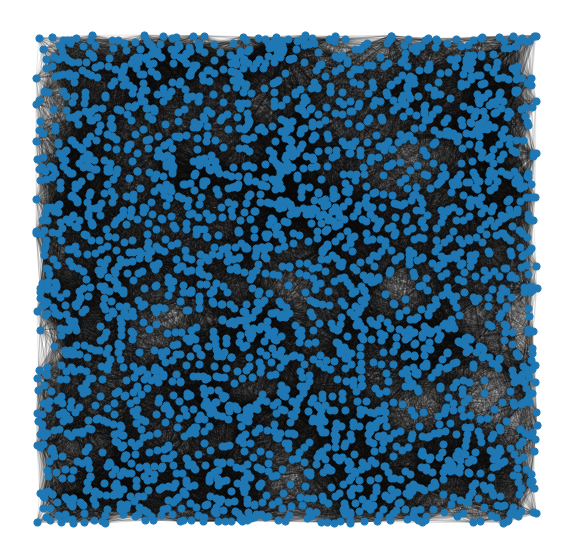

In [162]:
nver = 3000
G = nx.random_geometric_graph(n=nver, radius=0.125, dim=2, pos=None)
# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(G, 'pos')
nx.write_gpickle(G,file+'mape3000.gpl')

#path = [1, 3, 4, 5 ,60]
#H = G.subgraph(path)
#H = G.subgraph(range(nver))

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0

s  = (len(pos),3)
n_x_y = np.zeros(s)
s = (len(pos),nver-1)
NN_array = -1*np.ones(s)
 
for n in pos:
    x, y = pos[n]
    
    n_x_y[n,0]=int(n)
    n_x_y[n,1]=x
    n_x_y[n,2]=y
    
    a = np.array(list(G.neighbors(n)))
    NN_array[n,0:len(a)] = a 
    d = (x - 0.5)**2 + (y - 0.5)**2
    if d < dmin:
        ncenter = n
        dmin = d

        
n_x_y_NN = np.concatenate((n_x_y,NN_array),axis=1)

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))

np.savetxt(file+'map3000.dat',n_x_y_NN, delimiter=' ', fmt='%4g')   


plt.figure(figsize=(10, 10))
#nx.draw_networkx(H, pos=pos,node_color=['r'], edge_color=['r'])
nx.draw_networkx_edges(G, pos, 
                       nodelist=[ncenter], 
                       alpha=0.1)
nx.draw_networkx_nodes(G, pos, nodelist=list(p.keys()),
                       node_size=50,
#                       node_color=list(p.values()),
                       cmap=plt.cm.Reds_r)

#plt.xlim(-0.05, 1.05)
#plt.ylim(-0.05, 1.05)
plt.axis('off')
plt.show()



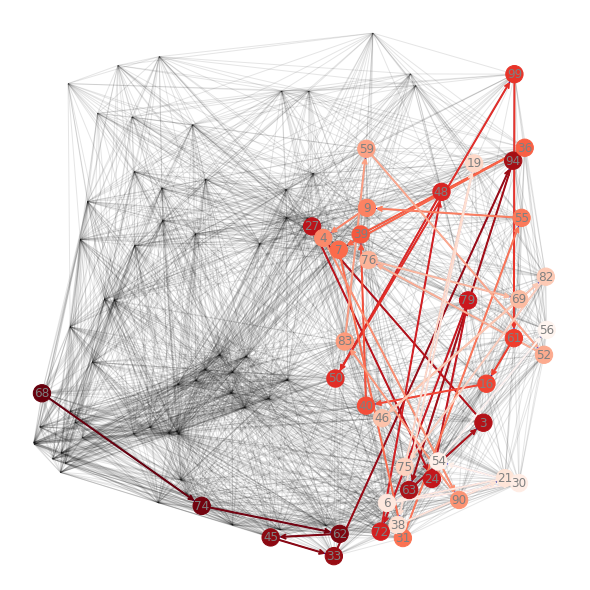

In [126]:
# write edgelist to grid.edgelist
#nx.write_edgelist(G, path=file+"grid.edgelist", delimiter=":", data=True)
# read edgelist from grid.edgelist
#T = nx.read_edgelist(path=file+"grid.edgelist", delimiter=":", data=True)
#B = nx.Graph(T)
#B.add_edge(T) 

H = nx.read_gpickle(file+'map100.gpl')
pos = nx.get_node_attributes(H,'pos')

#path = [1, 3, 4, 5 ,60]
path = [68, 74, 62, 45, 33, 94, 63, 3, 27, 24, 79, 72, 
        48, 50, 99, 61, 16, 40, 39, 36, 7, 31, 55, 9, 4, 
        90, 83, 59, 52, 76, 69, 46, 82, 75, 19, 38, 21, 6, 30, 54, 56]

E=nx.DiGraph()
E.add_nodes_from(path)

for ip in range(len(path)-1):
    ed = (path[ip],path[ip+1])
    E.add_edge(*ed)

    
pt = { i : i for i in range(len(path)) }    
#E = H.subgraph(path)

M = E.number_of_edges()
edge_colors = range(2, M + 2)

#fig, ax = plt.subplots(figsize=(10,12))
fig = plt.figure(figsize=(8, 8))

nx.draw_networkx(E, pos=pos, edge_color=['b'],
                 node_color=list(pt.values()),
#                 cmap="plasma",
                 font_color='gray',
                 cmap=plt.cm.Reds_r, 
                 with_labels = True,
                 arrows = False,
                 arrowsize=15, arrowstyle='->'
                )

nx.draw_networkx_edges(E,pos=pos, arrowstyle='->',
                               arrowsize=10, edge_color=edge_colors,
                               edge_cmap=plt.cm.Reds_r, width=2)

nx.draw_networkx_edges(H, pos, 
#                       nodelist=[ncenter], 
                       alpha=0.1)
#nx.draw_networkx_nodes(H, pos, 
#                       nodelist=list(p.keys()),
#                       node_size=50,
#                       node_color=list(p.values()),
#                       cmap=plt.cm.Reds_r)

#nx.draw(H,pos) 

#pos = nx.get_node_attributes(B, 'pos')
#H = T.subgraph(range(100))

#plt.figure(figsize=(10, 10))
#nx.draw_networkx(H, pos=pos)
#nx.draw_networkx_edges(T)
#nx.draw_random(T, with_labels = True) 
#pos = nx.get_node_attributes(T, 'pos')
#H = G.subgraph(range(10))
#nx.draw_networkx(H, pos=pos)
#nx.draw(T, pos=pos , with_labels=True ,node_size=250,node_color=['r'])
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis('off')

fig.tight_layout(pad=0, h_pad=0, w_pad=0)
plt.savefig('graph.png', format='png', dpi=300)   

plt.show()

a:
[[1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 0.]
 [1. 0. 1. 0. 1.]
 [0. 0. 1. 0. 0.]
 [1. 1. 1. 1. 0.]
 [1. 1. 1. 0. 1.]
 [1. 0. 1. 0. 0.]]
U nodes: [0 1 2 3 4 5 6]
V nodes: [ 7  8  9 10 11]
edges


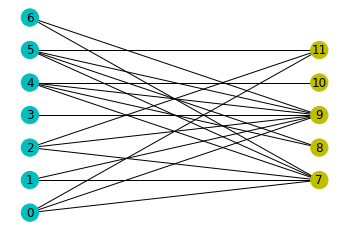

In [113]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


# Load the adjacency matrix into a numpy array.
a = np.loadtxt(file+'matrix.txt')

print ("a:")
print (a)

num_nodes = a.shape[0] + a.shape[1]

# Get the row and column coordinates where the array is 1.
rows, cols = np.where(a == 1)

# We label the nodes corresponding to the rows with integers from 0 to
# a.shape[0]-1, and we label the nodes corresponding to the columns with
# integers from a.shape[0] to a.shape[0] + a.shape[1] - 1.
# Rearranges the list of rows and columns into a list of edge tuples.
edges = zip(rows.tolist(), (cols + a.shape[0]).tolist())
print ("U nodes:", np.arange(a.shape[0]))
print ("V nodes:", np.arange(a.shape[1]) + a.shape[0])
print ("edges")
print (edges)

# Create a Graph object (from the networkx library).
b = nx.Graph()
b.add_nodes_from(range(num_nodes))  # This line not strictly necessry.
b.add_edges_from(edges)

# Draw the graph.  First create positions for each node. Put the U nodes
# on the left (x=1) and the V nodes on the right (x=2).
pos = dict([(k, (1, k - 0.5 * a.shape[0]))
            for k in range(a.shape[0])])
pos.update(dict([(k + a.shape[0], (2, k - 0.5 * a.shape[1]))
                  for k in range(a.shape[1])]))
nx.draw_networkx(b, pos=pos, node_color=(['c'] * a.shape[0]) + (['y'] * a.shape[1]))

plt.axis('off')
plt.show()


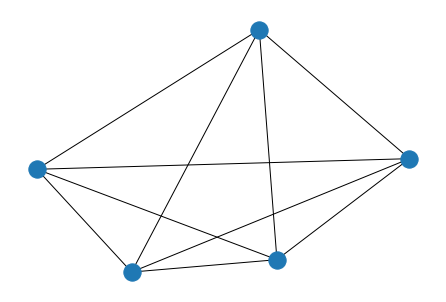

In [34]:
file = "/Users/hamilton/Documents/GitHub/DHPC/Workstation/"
G=nx.random_geometric_graph(5,1.)
pos = nx.get_node_attributes(G, 'pos')

nx.write_gpickle(G,file+'rgg.gpl')

#filename = file+"ipRandomGrid.txt" 
#fh=open(filename,'wb') 
#nx.write_adjlist(G, fh) 
nx.draw(G,pos) 
plt.show()

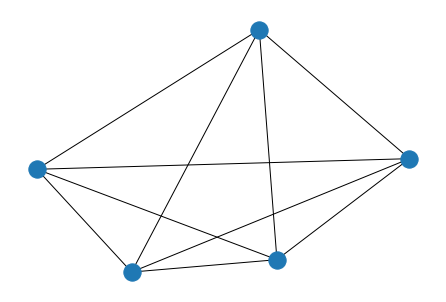

In [35]:
#filename = file+"ipRandomGrid.txt" 
#fh=open(filename, 'rb') 
#G=nx.Graph() 
#G=nx.read_adjlist(file+"ipRandomGrid.txt") 
#pos=nx.random_layout(G) 
#nx.draw_networkx_nodes(G,pos,nodelist=['1','2'],node_color='b') 
#nx.draw(G,pos) 

H = nx.read_gpickle(file+'rgg.gpl')
pos = nx.get_node_attributes(H,'pos')
nx.draw(H,pos) 
plt.show()

In [128]:
np.linspace(5, 20, 16)

array([ 5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17.,
       18., 19., 20.])

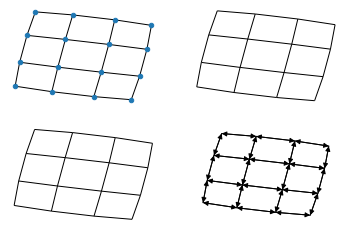

In [150]:
#!/usr/bin/env python
"""
Draw a graph with matplotlib.
You must have matplotlib for this to work.
"""
__author__ = """Aric Hagberg (hagberg@lanl.gov)"""
#    Copyright (C) 2004-2015
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

try:
    import matplotlib.pyplot as plt
except:
    raise

import networkx as nx

G=nx.grid_2d_graph(4,4)  #4x4 grid

pos=nx.spring_layout(G,iterations=1000)
#pos = nx.get_node_attributes(G, 'pos')

plt.subplot(221)
nx.draw(G,pos,node_size=20,font_size=2)

plt.subplot(222)
nx.draw(G,pos,node_color='k',node_size=0,with_labels=False)

plt.subplot(223)
nx.draw(G,pos,node_color='g',node_size=0,with_labels=False,width=1)

plt.subplot(224)
H=G.to_directed()
nx.draw(H,pos,node_color='b',node_size=0,with_labels=False)

plt.savefig("four_grids.png")
plt.show()